<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/%EB%B0%B0%ED%84%B0%EB%A6%AC%EC%88%98%EB%AA%85%EC%98%88%EC%B8%A1AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle
import numpy as np

batch1 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/batch1.pkl', 'rb')) # 46개, 5개 삭제해서 41개로, 그리고 b1c0, b1c1, b1c2, b1c3, b1c4는 batch2 결과와 연결됨
batch2 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/batch2.pkl', 'rb')) # 48개, 5개 삭제해서 43개로
batch3 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/batch3.pkl', 'rb')) # 46개, 6개 삭제해서 40개로

print(batch1.keys())
print(batch2.keys())
print(batch3.keys())

del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16'] # b1c0, b1c1, b1c2, b1c3, b1c4는 batch2 결과와 연결됨, 논문 서포팅을 참조하자

add_len = [662, 981, 1060, 208, 482]

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat1 = len(batch1.keys())
numBat2 = len(batch2.keys())
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3

bat_dict = {**batch1, **batch2, **batch3}

Mounted at /content/drive
dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])
dict_keys(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c7', 'b2c8', 'b2c9', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c15', 'b2c16', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47'])
dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13

In [ ]:
for cell_id in bat_dict:
    if 'charge_policy' in bat_dict[cell_id]:
        del bat_dict[cell_id]['charge_policy']


remove_keys = ['Qc', 'T', 'Tdlin']

for cell_id in bat_dict:
    for cycle_num, cycle_data in bat_dict[cell_id]['cycles'].items():
        for key in remove_keys:
            if key in cycle_data:
                del cycle_data[key]

# 제거할 키 리스트
remove_keys = ['QC', 'Tavg', 'Tmin']

for cell_id, cell_data in bat_dict.items():
    summary = cell_data.get('summary', {})
    for k in remove_keys:
        # 키가 있으면 제거
        if k in summary:
            summary.pop(k)

# 이후 확인 예시
print(bat_dict['b1c0'].keys())
print(bat_dict['b1c0']['summary'].keys())
# -> dict_keys(['IR', 'QD', 'chargetime', 'cycle'])


dict_keys(['cycle_life', 'summary', 'cycles'])
dict_keys(['IR', 'QD', 'Tmax', 'chargetime', 'cycle'])


In [ ]:
import numpy as np

def extract_discharge_data(cycle_data, voltage_threshold=2.0, min_q=0.0001):
    """
    주어진 cycle_data에서 방전 구간(용량 ≥ min_q, 전압 ≥ voltage_threshold) 만 남겨서
    (capacity_var, voltage_var, time_var)를 반환합니다.

    ※ 첫 번째 코드와 완전히 동일한 순서와 방식으로 필터링하도록 작성했습니다.
    """
    # 원본 배열을 numpy로 변환
    q_d     = np.array(cycle_data['Qd'])
    voltage = np.array(cycle_data['V'])
    time    = np.array(cycle_data['t'])

    # 1) min_q 이하의 Qd(노이즈) 제거: np.where(...)[0]로 정확히 1차원 인덱스만 추출
    error_idx = np.where(q_d < min_q)[0]
    if error_idx.size > 0:
        capacity_var = np.delete(q_d, error_idx)
        voltage_var  = np.delete(voltage, error_idx)
        time_var     = np.delete(time, error_idx)
    else:
        capacity_var = q_d.copy()
        voltage_var  = voltage.copy()
        time_var     = time.copy()

    # 2) voltage_threshold(예: 2.0V) 아래로 떨어지는 지점까지 자르기
    below_idx = np.where(voltage_var < voltage_threshold)[0]  # 1차원 인덱스
    if below_idx.size > 0:
        cut = below_idx[0]
        capacity_var = capacity_var[:cut]
        voltage_var  = voltage_var[:cut]
        time_var     = time_var[:cut]

    return capacity_var, voltage_var, time_var


# -------------------------------------------------------
# bat_dict의 모든 셀에 대해 반복하면서, 모든 사이클을 위 함수로 처리
# -------------------------------------------------------
for cell_id, cell_data in bat_dict.items():
    cycles_dict = cell_data.get('cycles', {})
    for cycle_id, cycle_data in cycles_dict.items():
        # capacity_var, voltage_var, time_var를 뽑아옵니다
        capacity_var, voltage_var, time_var = extract_discharge_data(cycle_data)

        # 원래의 리스트를 방전 구간만 남긴 값으로 덮어씁니다
        cycle_data['Qd'] = capacity_var.tolist()
        cycle_data['V']  = voltage_var.tolist()
        cycle_data['t']  = time_var.tolist()

100번째 사이클 피처

In [ ]:
import numpy as np
import pandas as pd

def compute_HI_for_cycle(cycle_data, delta_t=10):

    # 1) NumPy 배열로 변환
    capacity = np.array(cycle_data['Qd'])     # 누적 방전 용량 (Ah 혹은 같은 단위)
    voltage  = np.array(cycle_data['V'])      # 해당 시점 전압 (V)
    time_sec = np.array(cycle_data['t'])      # 해당 시점 시간 (s)

    # 2) 총방전용량 (마지막 값). SOC 계산에 사용
    Q_total = capacity[-1]

    # 3) HI를 저장할 dict 초기화
    hi = {}

    # 4) 계산할 HI 인덱스와 대응 SOC (%)
    #    HI6 → SOC 0.60, HI7 → SOC 0.70, HI8 → SOC 0.80
    target_list = [
        (6, 0.60),
        (7, 0.70),
        (8, 0.80),
        (8.5, 0.85),
        (9, 0.90),
        (9.5, 0.95),
        (9.75, 0.975)
    ]

    for idx, soc_target in target_list:
        # 4-1) SOC 목표 지점(용량) 계산
        Q_target = soc_target * Q_total

        # 4-2) capacity에서 Q_target에 가장 가까운 인덱스를 찾기
        #      (capacity는 누적 방전용량이므로, 오름차순으로 증가한다고 가정)
        i_start = np.argmin(np.abs(capacity - Q_target))

        # 4-3) 해당 시점의 시간
        t_start = time_sec[i_start]

        # 4-4) t_start + delta_t 이상인 인덱스 중 가장 작은 인덱스를 찾기
        #      만약 방전 구간 중 delta_t 이후가 없으면, 마지막 값 사용
        t_end_threshold = t_start + delta_t
        possible_idxs = np.where(time_sec >= t_end_threshold)[0]
        if possible_idxs.size > 0:
            i_end = possible_idxs[0]
        else:
            i_end = len(time_sec) - 1  # 방전 끝까지 못 가면 끝값 사용

        # 4-5) 기울기 계산: (V_end - V_start) / (t_end - t_start)
        delta_v = voltage[i_end] - voltage[i_start]
        delta_t_actual = time_sec[i_end] - time_sec[i_start]
        # 혹시 delta_t_actual = 0 인 경우를 피하기 위해 작은 값 대체
        if delta_t_actual <= 0:
            slope = 0.0
        else:
            slope = delta_v / delta_t_actual

        # 4-6) 결과 저장
        hi[f'HI{idx}'] = slope

    return hi


def compute_TIEDVD(cell_id, v_max=3.3, v_min=3):
    cycle_data = bat_dict[cell_id]['cycles']['100']
    v_arr = np.array(cycle_data['V'])
    t_arr = np.array(cycle_data['t'])

    try:
        start_idx = np.where(v_arr <= v_max)[0][0]
        end_idx   = np.where(v_arr <= v_min)[0][0]
        t_start = t_arr[start_idx]
        t_end   = t_arr[end_idx]
        return t_start, t_end, t_end - t_start
    except IndexError:
        return None, None, np.nan

def get_IR100(cell_id):
    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('IR', None)
    if ir_array is None or len(ir_array) <= 100:
        return np.nan
    return ir_array[100]

def get_cycle_life(cell_id):
    import numpy as np

    entry = bat_dict.get(cell_id, {}).get('cycle_life', None)
    # entry가 [[숫자]] 형태인지 확인
    try:
        # 첫 번째 중첩 리스트의 첫 번째 요소를 가져옴
        return entry[0][0]-100
    except Exception:
        return np.nan

def get_ct100(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('chargetime', None)
    if ir_array is None or len(ir_array) <= 100:
        return np.nan
    return ir_array[100]

def get_Tmax100(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('Tmax', None)
    if ir_array is None or len(ir_array) <= 100:
        return np.nan
    return ir_array[100]

In [ ]:
rows = []
for cell_id, cell_data in bat_dict.items():

    cycle_data = cell_data['cycles']['100']
    hi_vals = compute_HI_for_cycle(cycle_data, delta_t=10)
    t_start, t_end, tiedvd = compute_TIEDVD(cell_id)
    rows.append({
        'cell_id': cell_id,
        'cycle': 100,
        'HI6': hi_vals['HI6'],
        'HI7': hi_vals['HI7'],
        'HI8': hi_vals['HI8'],
        'HI8.5': hi_vals['HI8.5'],
        'HI9': hi_vals['HI9'],
        'HI9.5': hi_vals['HI9.5'],
        'HI9.75': hi_vals['HI9.75'],
        'TIEDVD': tiedvd
    })


df_hi_tiedvd_all = pd.DataFrame(rows)
df_hi_tiedvd_all['IR'] = df_hi_tiedvd_all['cell_id'].apply(get_IR100)
df_hi_tiedvd_all['chargetime'] = df_hi_tiedvd_all['cell_id'].apply(get_ct100)
df_hi_tiedvd_all['Tmax'] = df_hi_tiedvd_all['cell_id'].apply(get_Tmax100)
df_hi_tiedvd_all['cycle_life'] = df_hi_tiedvd_all['cell_id'].apply(get_cycle_life)




print(df_hi_tiedvd_all.head())
print("Rows count:", len(df_hi_tiedvd_all))

  cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9     HI9.5  \
0    b1c0    100 -0.182624 -0.238163 -0.338247 -0.438077 -0.597212 -1.013002   
1    b1c1    100 -0.183751 -0.235822 -0.341481 -0.429256 -0.606943 -1.032399   
2    b1c2    100 -0.181888 -0.236865 -0.335351 -0.433244 -0.615412 -1.000113   
3    b1c3    100 -0.183953 -0.236179 -0.341418 -0.427816 -0.599179 -0.980982   
4    b1c4    100 -0.180754 -0.235141 -0.332468 -0.428548 -0.578643 -0.973150   

     HI9.75     TIEDVD        IR  chargetime       Tmax  cycle_life  
0 -1.563502  11.136852  0.016650   13.342673  35.362850      1752.0  
1 -1.595320  11.141993  0.017005   13.341278  34.060535      2060.0  
2 -1.571007  11.297983  0.016859   13.341385  34.508823      2137.0  
3 -1.514266  11.242587  0.016414   12.008083  30.520380      1334.0  
4 -1.503461  11.032472  0.016751   12.092403  34.406719      1609.0  
Rows count: 124


In [ ]:
a = np.array(bat_dict['b1c1']['summary']['IR'][99])
print(a)

0.01699684


88번째 사이클 피처

In [ ]:
import numpy as np
import pandas as pd

def compute_HI_for_cycle(cycle_data, delta_t=10.0):

    # 1) NumPy 배열로 변환
    capacity = np.array(cycle_data['Qd'])     # 누적 방전 용량 (Ah 혹은 같은 단위)
    voltage  = np.array(cycle_data['V'])      # 해당 시점 전압 (V)
    time_sec = np.array(cycle_data['t'])      # 해당 시점 시간 (s)

    # 2) 총방전용량 (마지막 값). SOC 계산에 사용
    Q_total = capacity[-1]

    # 3) HI를 저장할 dict 초기화
    hi = {}

    # 4) 계산할 HI 인덱스와 대응 SOC (%)
    #    HI6 → SOC 0.60, HI7 → SOC 0.70, HI8 → SOC 0.80
    target_list = [
        (6, 0.60),
        (7, 0.70),
        (8, 0.80),
        (8.5, 0.85),
        (9, 0.90),
        (9.5, 0.95),
        (9.75, 0.975)
    ]

    for idx, soc_target in target_list:
        # 4-1) SOC 목표 지점(용량) 계산
        Q_target = soc_target * Q_total

        # 4-2) capacity에서 Q_target에 가장 가까운 인덱스를 찾기
        #      (capacity는 누적 방전용량이므로, 오름차순으로 증가한다고 가정)
        i_start = np.argmin(np.abs(capacity - Q_target))

        # 4-3) 해당 시점의 시간
        t_start = time_sec[i_start]

        # 4-4) t_start + delta_t 이상인 인덱스 중 가장 작은 인덱스를 찾기
        #      만약 방전 구간 중 delta_t 이후가 없으면, 마지막 값 사용
        t_end_threshold = t_start + delta_t
        possible_idxs = np.where(time_sec >= t_end_threshold)[0]
        if possible_idxs.size > 0:
            i_end = possible_idxs[0]
        else:
            i_end = len(time_sec) - 1  # 방전 끝까지 못 가면 끝값 사용

        # 4-5) 기울기 계산: (V_end - V_start) / (t_end - t_start)
        delta_v = voltage[i_end] - voltage[i_start]
        delta_t_actual = time_sec[i_end] - time_sec[i_start]
        # 혹시 delta_t_actual = 0 인 경우를 피하기 위해 작은 값 대체
        if delta_t_actual <= 0:
            slope = 0.0
        else:
            slope = delta_v / delta_t_actual

        # 4-6) 결과 저장
        hi[f'HI{idx}'] = slope

    return hi


def compute_TIEDVD(cell_id, v_max=3.3, v_min=3):
    cycle_data = bat_dict[cell_id]['cycles']['88']
    v_arr = np.array(cycle_data['V'])
    t_arr = np.array(cycle_data['t'])

    try:
        start_idx = np.where(v_arr <= v_max)[0][0]
        end_idx   = np.where(v_arr <= v_min)[0][0]
        t_start = t_arr[start_idx]
        t_end   = t_arr[end_idx]
        return t_start, t_end, t_end - t_start
    except IndexError:
        return None, None, np.nan

def get_IR88(cell_id):
    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('IR', None)
    if ir_array is None or len(ir_array) <= 88:
        return np.nan
    return ir_array[88]

def get_cycle_life(cell_id):
    import numpy as np

    entry = bat_dict.get(cell_id, {}).get('cycle_life', None)
    # entry가 [[숫자]] 형태인지 확인
    try:
        # 첫 번째 중첩 리스트의 첫 번째 요소를 가져옴
        return entry[0][0]-88
    except Exception:
        return np.nan

def get_ct88(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('chargetime', None)
    if ir_array is None or len(ir_array) <= 88:
        return np.nan
    return ir_array[88]

def get_Tmax88(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('Tmax', None)
    if ir_array is None or len(ir_array) <= 88:
        return np.nan
    return ir_array[88]

In [ ]:
rows = []
for cell_id, cell_data in bat_dict.items():

    cycle_data = cell_data['cycles']['88']
    hi_vals = compute_HI_for_cycle(cycle_data, delta_t=10)
    t_start, t_end, tiedvd = compute_TIEDVD(cell_id)
    rows.append({
        'cell_id': cell_id,
        'cycle': 88,
        'HI6': hi_vals['HI6'],
        'HI7': hi_vals['HI7'],
        'HI8': hi_vals['HI8'],
        'HI8.5': hi_vals['HI8.5'],
        'HI9': hi_vals['HI9'],
        'HI9.5': hi_vals['HI9.5'],
        'HI9.75': hi_vals['HI9.75'],
        'TIEDVD': tiedvd
    })


df_hi_tiedvd_all_88 = pd.DataFrame(rows)
df_hi_tiedvd_all_88['IR'] = df_hi_tiedvd_all_88['cell_id'].apply(get_IR88)
df_hi_tiedvd_all_88['chargetime'] = df_hi_tiedvd_all_88['cell_id'].apply(get_ct88)
df_hi_tiedvd_all_88['Tmax'] = df_hi_tiedvd_all_88['cell_id'].apply(get_Tmax88)
df_hi_tiedvd_all_88['cycle_life'] = df_hi_tiedvd_all_88['cell_id'].apply(get_cycle_life)




print(df_hi_tiedvd_all_88.head())
print("Rows count:", len(df_hi_tiedvd_all_88))

  cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9     HI9.5  \
0    b1c0     88 -0.185053 -0.237669 -0.344410 -0.433068 -0.613643 -1.013506   
1    b1c1     88 -0.183903 -0.236201 -0.334061 -0.431311 -0.611854 -1.013380   
2    b1c2     88 -0.182548 -0.237658 -0.336441 -0.434508 -0.617365 -1.013788   
3    b1c3     88 -0.181848 -0.236683 -0.334356 -0.430489 -0.605457 -1.003722   
4    b1c4     88 -0.181702 -0.236149 -0.333450 -0.429362 -0.604961 -0.990221   

     HI9.75     TIEDVD        IR  chargetime       Tmax  cycle_life  
0 -1.624252  11.161927  0.016641   13.340767  35.349518      1764.0  
1 -1.575303  11.160687  0.017004   13.341130  34.023392      2072.0  
2 -1.600389  11.300345  0.016865   13.341205  34.459759      2149.0  
3 -1.523057  11.258877  0.016373   12.092378  30.731298      1346.0  
4 -1.502847  11.020992  0.016715   12.092390  34.435768      1621.0  
Rows count: 124


In [ ]:
import numpy as np
import pandas as pd

def compute_HI_for_cycle(cycle_data, delta_t=10.0):

    # 1) NumPy 배열로 변환
    capacity = np.array(cycle_data['Qd'])     # 누적 방전 용량 (Ah 혹은 같은 단위)
    voltage  = np.array(cycle_data['V'])      # 해당 시점 전압 (V)
    time_sec = np.array(cycle_data['t'])      # 해당 시점 시간 (s)

    # 2) 총방전용량 (마지막 값). SOC 계산에 사용
    Q_total = capacity[-1]

    # 3) HI를 저장할 dict 초기화
    hi = {}

    # 4) 계산할 HI 인덱스와 대응 SOC (%)
    #    HI6 → SOC 0.60, HI7 → SOC 0.70, HI8 → SOC 0.80
    target_list = [
        (6, 0.60),
        (7, 0.70),
        (8, 0.80),
        (8.5, 0.85),
        (9, 0.90),
        (9.5, 0.95),
        (9.75, 0.975)
    ]

    for idx, soc_target in target_list:
        # 4-1) SOC 목표 지점(용량) 계산
        Q_target = soc_target * Q_total

        # 4-2) capacity에서 Q_target에 가장 가까운 인덱스를 찾기
        #      (capacity는 누적 방전용량이므로, 오름차순으로 증가한다고 가정)
        i_start = np.argmin(np.abs(capacity - Q_target))

        # 4-3) 해당 시점의 시간
        t_start = time_sec[i_start]

        # 4-4) t_start + delta_t 이상인 인덱스 중 가장 작은 인덱스를 찾기
        #      만약 방전 구간 중 delta_t 이후가 없으면, 마지막 값 사용
        t_end_threshold = t_start + delta_t
        possible_idxs = np.where(time_sec >= t_end_threshold)[0]
        if possible_idxs.size > 0:
            i_end = possible_idxs[0]
        else:
            i_end = len(time_sec) - 1  # 방전 끝까지 못 가면 끝값 사용

        # 4-5) 기울기 계산: (V_end - V_start) / (t_end - t_start)
        delta_v = voltage[i_end] - voltage[i_start]
        delta_t_actual = time_sec[i_end] - time_sec[i_start]
        # 혹시 delta_t_actual = 0 인 경우를 피하기 위해 작은 값 대체
        if delta_t_actual <= 0:
            slope = 0.0
        else:
            slope = delta_v / delta_t_actual

        # 4-6) 결과 저장
        hi[f'HI{idx}'] = slope

    return hi


def compute_TIEDVD(cell_id, v_max=3.3, v_min=3):
    cycle_data = bat_dict[cell_id]['cycles']['75']
    v_arr = np.array(cycle_data['V'])
    t_arr = np.array(cycle_data['t'])

    try:
        start_idx = np.where(v_arr <= v_max)[0][0]
        end_idx   = np.where(v_arr <= v_min)[0][0]
        t_start = t_arr[start_idx]
        t_end   = t_arr[end_idx]
        return t_start, t_end, t_end - t_start
    except IndexError:
        return None, None, np.nan

def get_IR75(cell_id):
    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('IR', None)
    if ir_array is None or len(ir_array) <= 75:
        return np.nan
    return ir_array[75]

def get_cycle_life(cell_id):
    import numpy as np

    entry = bat_dict.get(cell_id, {}).get('cycle_life', None)
    # entry가 [[숫자]] 형태인지 확인
    try:
        # 첫 번째 중첩 리스트의 첫 번째 요소를 가져옴
        return entry[0][0]-75
    except Exception:
        return np.nan

def get_ct75(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('chargetime', None)
    if ir_array is None or len(ir_array) <= 75:
        return np.nan
    return ir_array[75]

def get_Tmax75(cell_id):

    summary = bat_dict[cell_id].get('summary', {})
    ir_array = summary.get('Tmax', None)
    if ir_array is None or len(ir_array) <= 75:
        return np.nan
    return ir_array[75]





rows = []
for cell_id, cell_data in bat_dict.items():

    cycle_data = cell_data['cycles']['75']
    hi_vals = compute_HI_for_cycle(cycle_data, delta_t=10.0)
    t_start, t_end, tiedvd = compute_TIEDVD(cell_id)
    rows.append({
        'cell_id': cell_id,
        'cycle': 75,
        'HI6': hi_vals['HI6'],
        'HI7': hi_vals['HI7'],
        'HI8': hi_vals['HI8'],
        'HI8.5': hi_vals['HI8.5'],
        'HI9': hi_vals['HI9'],
        'HI9.5': hi_vals['HI9.5'],
        'HI9.75': hi_vals['HI9.75'],
        'TIEDVD': tiedvd
    })


df_hi_tiedvd_all_75 = pd.DataFrame(rows)
df_hi_tiedvd_all_75['IR'] = df_hi_tiedvd_all_75['cell_id'].apply(get_IR75)
df_hi_tiedvd_all_75['chargetime'] = df_hi_tiedvd_all_75['cell_id'].apply(get_ct75)
df_hi_tiedvd_all_75['Tmax'] = df_hi_tiedvd_all_75['cell_id'].apply(get_Tmax75)
df_hi_tiedvd_all_75['cycle_life'] = df_hi_tiedvd_all_75['cell_id'].apply(get_cycle_life)




print(df_hi_tiedvd_all_75.head())
print("Rows count:", len(df_hi_tiedvd_all_75))

  cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9     HI9.5  \
0    b1c0     75 -0.184797 -0.237850 -0.337492 -0.437014 -0.624273 -1.034974   
1    b1c1     75 -0.184075 -0.236286 -0.342318 -0.430709 -0.610319 -1.016127   
2    b1c2     75 -0.183575 -0.235635 -0.341045 -0.428579 -0.606252 -1.037354   
3    b1c3     75 -0.182333 -0.237552 -0.336139 -0.433451 -0.611755 -0.986617   
4    b1c4     75 -0.181251 -0.235727 -0.333277 -0.429839 -0.607733 -1.005049   

     HI9.75     TIEDVD        IR  chargetime       Tmax  cycle_life  
0 -1.663625  11.217368  0.016645   13.341822  35.595509      1777.0  
1 -1.627802  11.157070  0.016937   13.341328  34.008369      2085.0  
2 -1.587145  11.263838  0.016775   13.426133  34.379669      2162.0  
3 -1.540387  11.301732  0.016359   12.008295  30.469440      1359.0  
4 -1.533564  11.121022  0.016718   12.008268  34.330696      1634.0  
Rows count: 124


In [ ]:
# 예: df라는 이름의 DataFrame을 삭제
del df_all


In [ ]:
print(df_all)

    cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9  \
0      b1c0    100 -0.182624 -0.238163 -0.338247 -0.438077 -0.597212   
1      b1c1    100 -0.183751 -0.235822 -0.341481 -0.429256 -0.606943   
2      b1c2    100 -0.181888 -0.236865 -0.335351 -0.433244 -0.615412   
3      b1c3    100 -0.183953 -0.236179 -0.341418 -0.427816 -0.599179   
4      b1c4    100 -0.180754 -0.235141 -0.332468 -0.428548 -0.578643   
..      ...    ...       ...       ...       ...       ...       ...   
367   b3c41     75 -0.186827 -0.241526 -0.344980 -0.448634 -0.614145   
368   b3c42     75 -0.185307 -0.242905 -0.347798 -0.439229 -0.626393   
369   b3c43     75 -0.186047 -0.239797 -0.348906 -0.438870 -0.615947   
370   b3c44     75 -0.186947 -0.240986 -0.342614 -0.443799 -0.603417   
371   b3c45     75 -0.187462 -0.241969 -0.344760 -0.447983 -0.613248   

        HI9.5    HI9.75     TIEDVD        IR  chargetime       Tmax  \
0   -1.013002 -1.563502  11.136852  0.016650   13.342673  35.362

In [ ]:
import pandas as pd

df_all = pd.concat([df_hi_tiedvd_all, df_hi_tiedvd_all_88, df_hi_tiedvd_all_75], axis=0, ignore_index=True)

# (2) 결과 확인
print(df_all.shape)   # (df100_rows + df50_rows, 컬럼수)
print(df_all.head())  # 앞쪽 일부
print(df_all.tail())  # 뒤쪽 일부


(372, 14)
  cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9     HI9.5  \
0    b1c0    100 -0.182624 -0.238163 -0.338247 -0.438077 -0.597212 -1.013002   
1    b1c1    100 -0.183751 -0.235822 -0.341481 -0.429256 -0.606943 -1.032399   
2    b1c2    100 -0.181888 -0.236865 -0.335351 -0.433244 -0.615412 -1.000113   
3    b1c3    100 -0.183953 -0.236179 -0.341418 -0.427816 -0.599179 -0.980982   
4    b1c4    100 -0.180754 -0.235141 -0.332468 -0.428548 -0.578643 -0.973150   

     HI9.75     TIEDVD        IR  chargetime       Tmax  cycle_life  
0 -1.563502  11.136852  0.016650   13.342673  35.362850      1752.0  
1 -1.595320  11.141993  0.017005   13.341278  34.060535      2060.0  
2 -1.571007  11.297983  0.016859   13.341385  34.508823      2137.0  
3 -1.514266  11.242587  0.016414   12.008083  30.520380      1334.0  
4 -1.503461  11.032472  0.016751   12.092403  34.406719      1609.0  
    cell_id  cycle       HI6       HI7       HI8     HI8.5       HI9  \
367   b3c41     7

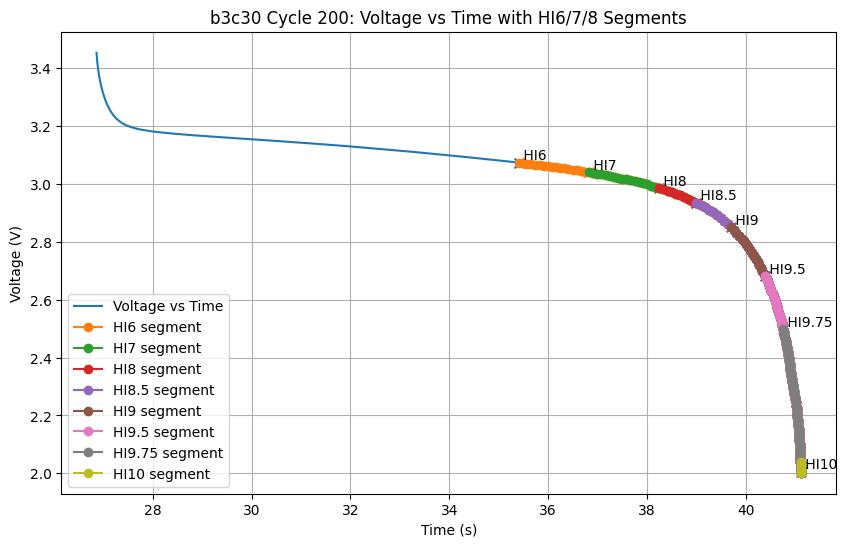

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 대상 셀과 사이클 설정
cell_id = 'b3c30'
cycle = '200'
cycle_data = bat_dict[cell_id]['cycles'][cycle]

# NumPy 변환
capacity = np.array(cycle_data['Qd'])
voltage  = np.array(cycle_data['V'])
time_sec = np.array(cycle_data['t'])

# 총 방전 용량
Q_total = capacity[-1]
delta_t = 10.0

# HI6, HI7, HI8 지점 계산
target_list = [(6, 0.60), (7, 0.70), (8, 0.80),(8.5, 0.85), (9, 0.90),(9.5, 0.95),(9.75, 0.975),(10,1)]
hi_segments = []
for idx, soc in target_list:
    Q_target = soc * Q_total
    i_start = np.argmin(np.abs(capacity - Q_target))
    t_start = time_sec[i_start]
    possible = np.where(time_sec >= t_start + delta_t)[0]
    i_end = possible[0] if possible.size > 0 else len(time_sec) - 1
    hi_segments.append((idx, i_start, i_end))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(time_sec, voltage, label='Voltage vs Time')

for idx, i_start, i_end in hi_segments:
    # 기울기 구간 강조
    plt.plot(time_sec[i_start:i_end+1],
             voltage[i_start:i_end+1],
             marker='o',
             label=f'HI{idx} segment')
    # 시작점 표시
    plt.scatter(time_sec[i_start], voltage[i_start], s=50, marker='x')
    plt.text(time_sec[i_start], voltage[i_start],
             f' HI{idx}', verticalalignment='bottom')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title(f'{cell_id} Cycle {cycle}: Voltage vs Time with HI6/7/8 Segments')
plt.legend()
plt.grid(True)
plt.show()


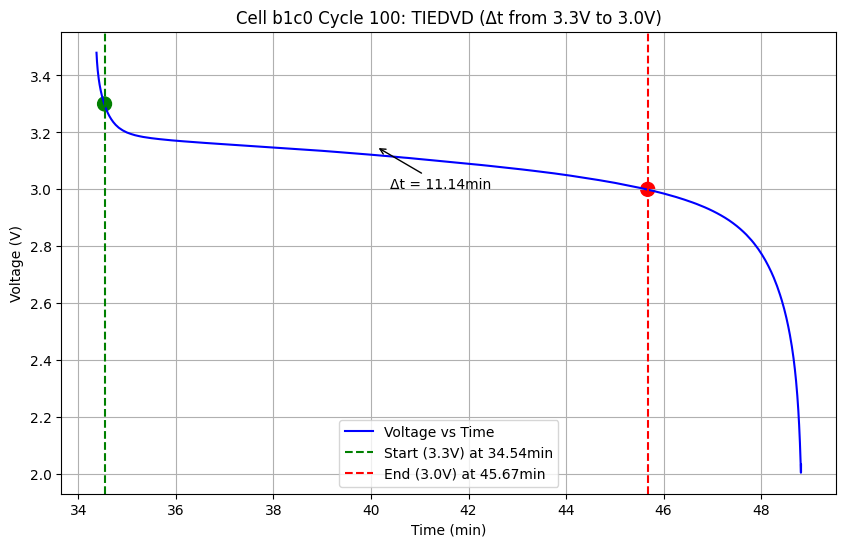

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_TIEDVD(cell_id, cycle, v_max=3.3, v_min=3.0):
    """
    Plots the discharge voltage curve for the specified cell and cycle,
    marking the TIEDVD start and end points, and displays the time difference.
    """
    # Retrieve cycle data
    cycle_str = str(cycle)
    cycle_data = bat_dict[cell_id]['cycles'].get(cycle_str, None)
    if cycle_data is None:
        print(f"Cycle {cycle} data not found for cell {cell_id}.")
        return

    # Convert to numpy arrays
    v_arr = np.array(cycle_data['V'])
    t_arr = np.array(cycle_data['t'])

    # Compute indices for thresholds
    try:
        idx_start = np.where(v_arr <= v_max)[0][0]
        idx_end   = np.where(v_arr <= v_min)[0][0]
    except IndexError:
        print(f"Voltage thresholds not reached in cycle {cycle} for cell {cell_id}.")
        return

    # Extract times
    t_start = t_arr[idx_start]
    t_end   = t_arr[idx_end]
    dt = t_end - t_start

    # Plot full discharge curve
    plt.figure(figsize=(10, 6))
    plt.plot(t_arr, v_arr, label='Voltage vs Time', color='blue')

    # Mark start and end points
    plt.axvline(t_start, color='green', linestyle='--', label=f'Start ({v_max}V) at {t_start:.2f}min')
    plt.axvline(t_end, color='red', linestyle='--', label=f'End ({v_min}V) at {t_end:.2f}min')
    plt.scatter([t_start, t_end], [v_max, v_min], color=['green','red'], s=100)

    # Annotate Δt
    plt.annotate(f'Δt = {dt:.2f}min', xy=((t_start + t_end) / 2, (v_max + v_min) / 2),
                 xytext=(10, -30), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))

    # Labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Cell {cell_id} Cycle {cycle}: TIEDVD (Δt from {v_max}V to {v_min}V)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_TIEDVD('b1c0', 100, v_max=3.3, v_min=3.0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 722.2966 - mse: 655271.1875 - val_loss: 689.2135 - val_mse: 607465.7500
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 722.2435 - mse: 655195.9375 - val_loss: 689.1611 - val_mse: 607395.7500
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 722.1876 - mse: 655117.8750 - val_loss: 689.1036 - val_mse: 607318.6875
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 722.1271 - mse: 655032.7500 - val_loss: 689.0384 - val_mse: 607230.7500
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 722.0582 - mse: 654935.8125 - val_loss: 688.9623 - val_mse: 607127.5625
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 721.9785 - mse: 654823.0625 - val_loss: 688.8724 - val_mse: 607005.4375
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 721.8848 - mse: 654690.2500 - val_loss: 688.7662 - val_mse: 606861.5000
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 721.7741 - mse: 654533.87

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

🔍 테스트 세트 MAE (Loss): 116.02
✅ 테스트 세트 MSE (정확도 해석용): 23634.57 cycles
❇️ 결정계수 R²: 0.852


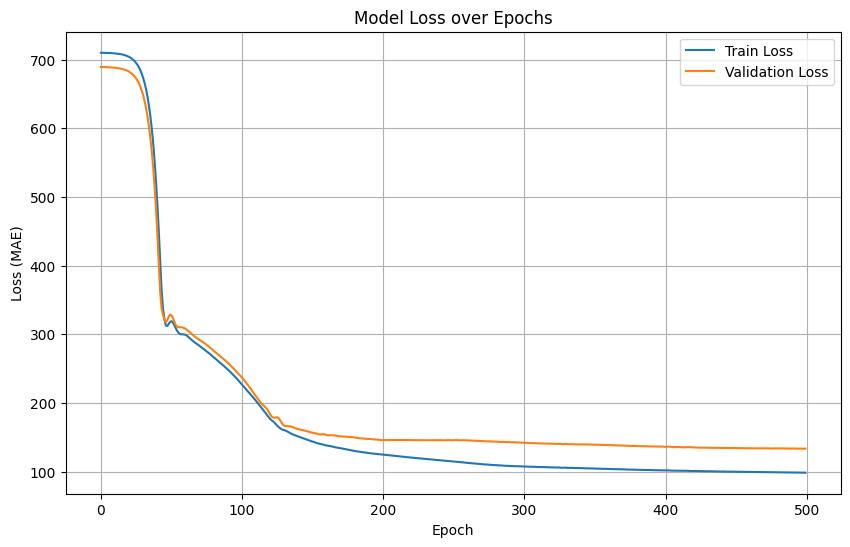

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import random, numpy as np, tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# 입력 (X), 출력 (y) 정의
# 'cell_id'와 'cycle'은 특성으로 사용하지 않습니다. 'cycle_life'가 예측 대상입니다.
feature_cols = ['HI8','HI9','HI9.5','HI9.75', 'TIEDVD', 'IR', 'Tmax','chargetime']
target_col = 'cycle_life'

X = df_all[feature_cols].values
y = df_all[target_col].values



scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # 회귀 문제이므로 출력 레이어는 1개의 노드
    ])

# 모델 컴파일
optimizer = Adam(learning_rate=0.001) # 학습률 조정 가능
model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1, validation_split=0.2)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n🔍 테스트 세트 MAE (Loss): {mae:.2f}")
print(f"✅ 테스트 세트 MSE (정확도 해석용): {mse:.2f} cycles")
# 예측값 y_pred, 실제값 y_test 가 이미 있다고 가정
r2 = r2_score(y_test, y_pred)
print(f"❇️ 결정계수 R²: {r2:.3f}")


# 학습 과정 시각화 (Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Model Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train.shape[1]

8

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,802,885 (6.88 MB)

 Trainable params: 600,961 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,201,924 (4.58 MB)

In [ ]:
print('모델 평가')
evaluation = model.evaluate(X_test, y_test)
print('Accuracy: ' + str(evaluation[1]))
print(f"❇️ 결정계수 R²: {r2:.3f}")

모델 평가
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 85.8768 - mse: 15081.6973
Accuracy: 12238.6171875
❇️ 결정계수 R²: 0.924


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
정답값 = 387.0, 예측값 = 390.5340576171875
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 517.0, 예측값 = 394.7127990722656
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 688.0, 예측값 = 739.5883178710938
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
정답값 = 406.0, 예측값 = 385.8910827636719
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 389.0, 예측값 = 402.3992004394531
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 1070.0, 예측값 = 940.7340087890625
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 399.0, 예측값 = 450.0870666503906
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
정답값 = 686.0, 예측값 = 469.2852783203125
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 414.0, 예측값 = 597.8187866210938
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
정답값 = 2149.0, 예측값 = 2152.4482421875
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
정답값 = 762.0, 예측값 = 920.0597534179688
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
정답값 = 516.0, 예측값 = 411.2193603515625
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
정답값 = 654.0, 예측값 = 624.9050903320312
4/4 ━━━━━━━━━━━━━━━━━━━━ 

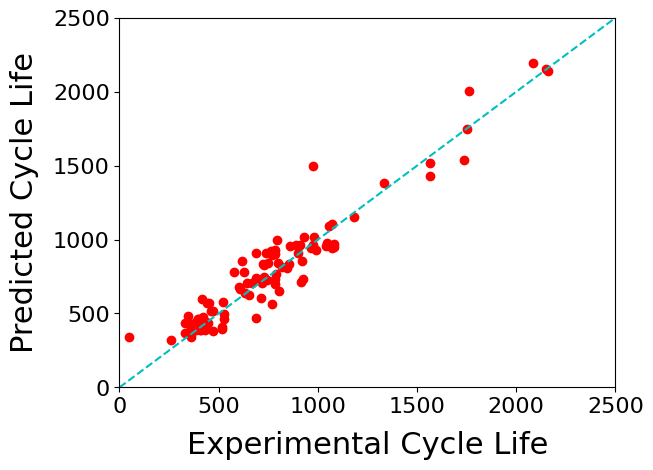

PearsonRResult(statistic=np.float64(0.9634476099738727), pvalue=np.float64(9.38770888051148e-65))


In [ ]:
from scipy import stats
expt_val = []
pred_val = []

for i in range(len(y_test)):
    y_pred = model.predict(X_test)
    print("정답값 = {}, 예측값 = {}".format(y_test[i], y_pred[i][0]))
    plt.scatter(y_test[i], y_pred[i][0], color='r')
    expt_val.append(y_test[i])
    pred_val.append(y_pred[i][0])

plt.plot([0, 3000], [0, 3000], 'c--')
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.xlabel('Experimental Cycle Life', size=22, labelpad=10)
plt.ylabel('Predicted Cycle Life', size=22, labelpad=10)
plt.yticks(size=16)
plt.xticks(size=16)
plt.show()

pc = stats.pearsonr(expt_val, pred_val)
print(pc)


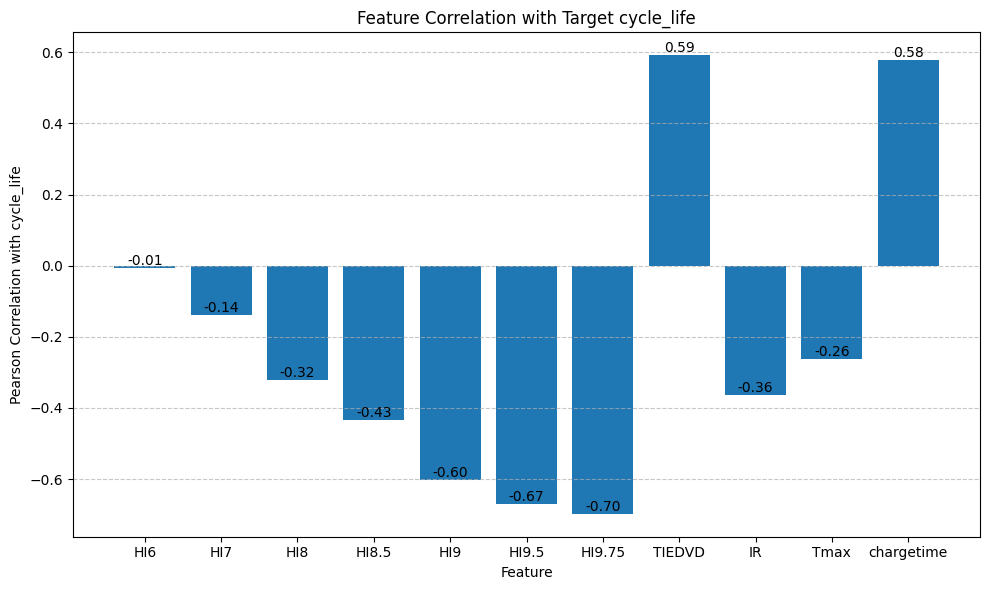

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df_all DataFrame이 이미 존재하며, feature_cols와 target_col이 정의되어 있음

# 1) feature와 타깃 연결하여 상관계수 계산
corr_series = df_all[feature_cols + [target_col]].corr()[target_col][feature_cols]

# 2) 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(corr_series.index, corr_series.values)

# 각 막대 위에 상관계수 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.xlabel('Feature')
plt.ylabel('Pearson Correlation with cycle_life')
plt.title('Feature Correlation with Target cycle_life')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 2) 테스트용 DataFrame 재구성
df_test = pd.DataFrame(X_test, columns=feature_cols)
df_test['predicted_RUL'] = y_pred.flatten()
df_test['true_RUL']      = y_test

# 3) 각 피처와 예측값 간의 상관계수 계산
corrs = df_test[feature_cols + ['predicted_RUL']].corr()['predicted_RUL'][feature_cols]

# 4) 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
corrs.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Pearson Correlation with Predicted RUL')
plt.title('각 피처별 예측값과의 상관관계')
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Shape of passed values is (112, 9), indices imply (112, 11)

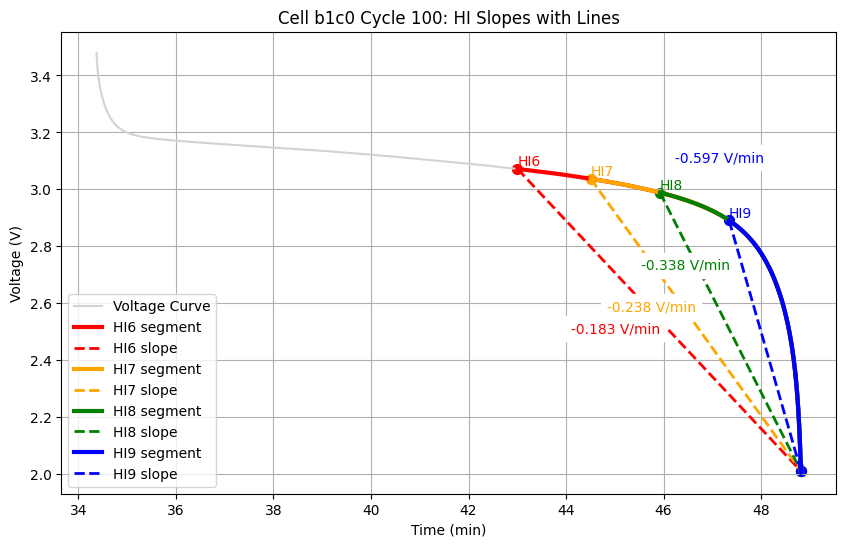

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_HI_slopes_with_lines(cell_id, cycle_num, delta_t=10.0):
    """
    Plots the discharge voltage curve and overlays both the segment and the best-fit slope lines
    for HI6, HI7, HI8, HI9, annotated with slope values.
    """
    cycle_data = bat_dict[cell_id]['cycles'].get(str(cycle_num))
    if cycle_data is None:
        print(f"No data for cell {cell_id} cycle {cycle_num}.")
        return

    # Extract arrays
    capacity = np.array(cycle_data['Qd'])
    voltage  = np.array(cycle_data['V'])
    time_sec = np.array(cycle_data['t'])
    Q_total = capacity[-1]

    # Define HI targets
    target_list = [
        (6, 0.60),
        (7, 0.70),
        (8, 0.80),
        (9, 0.90)
    ]

    plt.figure(figsize=(10, 6))
    plt.plot(time_sec, voltage, label='Voltage Curve', color='lightgray')

    colors = ['red', 'orange', 'green', 'blue']
    for (idx, soc), color in zip(target_list, colors):
        # Calculate start index
        Q_target = soc * Q_total
        i_start = np.argmin(np.abs(capacity - Q_target))
        t_start = time_sec[i_start]
        v_start = voltage[i_start]

        # Calculate end index
        t_end_threshold = t_start + delta_t
        possible_idxs = np.where(time_sec >= t_end_threshold)[0]
        i_end = possible_idxs[0] if possible_idxs.size > 0 else len(time_sec) - 1
        t_end = time_sec[i_end]
        v_end = voltage[i_end]

        # Calculate slope
        slope = (v_end - v_start) / (t_end - t_start) if (t_end - t_start) > 0 else 0.0

        # Plot the actual segment
        plt.plot(time_sec[i_start:i_end+1], voltage[i_start:i_end+1],
                 color=color, linewidth=3, label=f'HI{idx} segment')

        # Plot the slope line over the same interval
        t_line = np.array([t_start, t_end])
        v_line = v_start + slope * (t_line - t_start)
        plt.plot(t_line, v_line, '--', color=color, linewidth=2, label=f'HI{idx} slope')

        # Annotate slope value at midpoint
        mid_t = (t_start + t_end) / 2.04
        mid_v = v_start + slope * ((mid_t - t_start))*1.6
        plt.text(mid_t, mid_v, f'{slope:.3f} V/min', color=color,
                 ha='center', va='bottom', fontsize=10, backgroundcolor='white')

        # Mark points
        plt.scatter([t_start, t_end], [v_start, v_end], color=color, s=50)
        plt.text(t_start, v_start, f'HI{idx}', color=color, verticalalignment='bottom')

    plt.xlabel('Time (min)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Cell {cell_id} Cycle {cycle_num}: HI Slopes with Lines')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_HI_slopes_with_lines('b1c0', 100, delta_t=10.0)


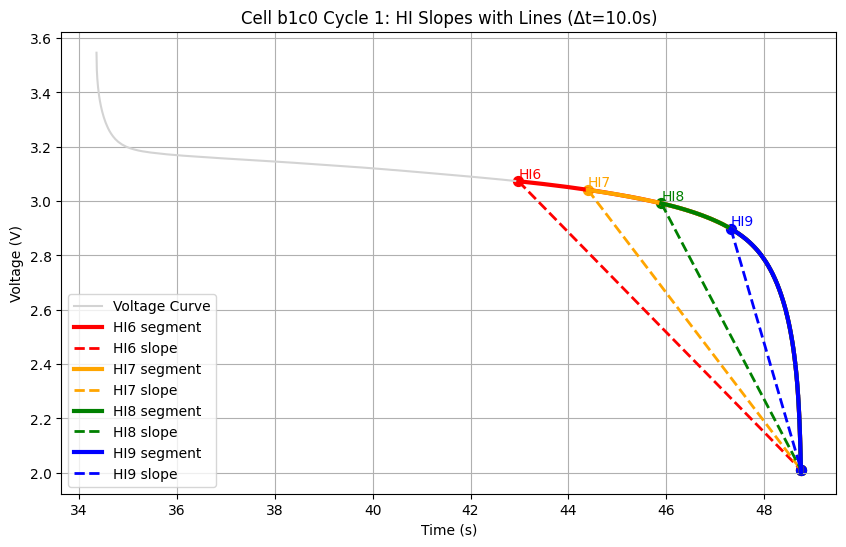

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_HI_slopes_with_lines(cell_id, cycle_num, delta_t=10.0):
    """
    Plots the discharge voltage curve and overlays both the segment and the best-fit slope lines
    for HI6, HI7, HI8, HI9.
    """
    cycle_data = bat_dict[cell_id]['cycles'].get(str(cycle_num))
    if cycle_data is None:
        print(f"No data for cell {cell_id} cycle {cycle_num}.")
        return

    # Extract arrays
    capacity = np.array(cycle_data['Qd'])
    voltage  = np.array(cycle_data['V'])
    time_sec = np.array(cycle_data['t'])
    Q_total = capacity[-1]

    # Define HI targets
    target_list = [
        (6, 0.60),
        (7, 0.70),
        (8, 0.80),
        (9, 0.90)
    ]

    plt.figure(figsize=(10, 6))
    plt.plot(time_sec, voltage, label='Voltage Curve', color='lightgray')

    colors = ['red', 'orange', 'green', 'blue']
    for (idx, soc), color in zip(target_list, colors):
        # Calculate start index
        Q_target = soc * Q_total
        i_start = np.argmin(np.abs(capacity - Q_target))
        t_start = time_sec[i_start]
        v_start = voltage[i_start]

        # Calculate end index
        t_end_threshold = t_start + delta_t
        possible_idxs = np.where(time_sec >= t_end_threshold)[0]
        i_end = possible_idxs[0] if possible_idxs.size > 0 else len(time_sec) - 1
        t_end = time_sec[i_end]
        v_end = voltage[i_end]

        # Calculate slope
        slope = (v_end - v_start) / (t_end - t_start) if (t_end - t_start) > 0 else 0.0

        # Plot the actual segment
        plt.plot(time_sec[i_start:i_end+1], voltage[i_start:i_end+1],
                 color=color, linewidth=3, label=f'HI{idx} segment')

        # Plot the slope line over the same interval
        t_line = np.array([t_start, t_end])
        v_line = v_start + slope * (t_line - t_start)
        plt.plot(t_line, v_line, '--', color=color, linewidth=2, label=f'HI{idx} slope')

        # Mark points
        plt.scatter([t_start, t_end], [v_start, v_end], color=color, s=50)
        plt.text(t_start, v_start, f'HI{idx}', color=color, verticalalignment='bottom')

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Cell {cell_id} Cycle {cycle_num}: HI Slopes with Lines (Δt={delta_t}min)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_HI_slopes_with_lines('b1c0', 1, delta_t=10.0)


In [ ]:
print("Feature columns:", feature_cols)
print("Shape of X_test:", X_test.shape)

Feature columns: ['HI6', 'HI7', 'HI8', 'HI8.5', 'HI9', 'HI9.5', 'HI9.75', 'TIEDVD', 'IR', 'Tmax', 'chargetime']
Shape of X_test: (112, 9)
